<a href="https://colab.research.google.com/github/arfin-arif/ml/blob/main/bengali_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import numpy as np
import tensorflow
import cv2

In [ ]:
# !unzip "/content/bengali_digits.zip" -d "/content/train"

In [ ]:
# tarin = ImageDataGenerator(rescale =1/255)
# validation = ImageDataGenerator(rescale =1/255)

In [ ]:
# tasting = ImageDataGenerator(rescale=1/255)
dataset = ImageDataGenerator(rescale=1/255)

train_dataset = dataset.flow_from_directory(
    '/content/train/',
    target_size=(28, 28),
    batch_size=10,
    class_mode='categorical',  # Set to 'categorical' for multiple classes
    classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],  # Specify the class labels
)


Found 15620 images belonging to 10 classes.


In [ ]:
train_dataset.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [ ]:
train_dataset.labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
df = pd.DataFrame(train_dataset.labels)

In [ ]:
df.to_csv("dataset_labes", sep=',', encoding='utf-8')

In [ ]:
train = train_dataset.image_data_generator

In [ ]:
# Get a batch of data from the generator
batch = next(train_dataset)

# Extract the images and labels from the batch
images, labels = batch

Shape of pixel values array: (28, 28, 3)


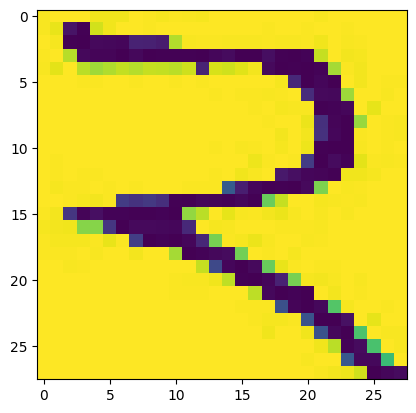

In [ ]:


# Get the pixel values of the first image in the batch
first_image_pixels = images[0]

# Print the shape of the pixel values array
print("Shape of pixel values array:", first_image_pixels.shape)

# converting image to one chanel
img_gray= cv2.cvtColor(first_image_pixels,cv2.COLOR_BGR2GRAY)
img_gray.shape
plt.imshow(img_gray)

# Print the pixel values
# print("Pixel values:")
# print(first_image_pixels)

# Final code from here

**SEE BELOW
**


In [ ]:

# Load the dataset
dataset = ImageDataGenerator(rescale=1/255)
train_dataset = dataset.flow_from_directory(
    '/content/train/',
    target_size=(28, 28),
    batch_size=10,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
)

# Get the number of samples in your dataset
num_samples = train_dataset.samples

# Initialize lists to store pixel values and labels
pixel_values_list = []
labels_list = []

# Set batch size
batch_size = 10

# Iterate over batches to get all pixel values and labels
for _ in range(num_samples // batch_size):
    batch = next(train_dataset)
    images, labels = batch

    # Convert images to single-channel (grayscale) and flatten
    flattened_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).flatten() for image in images])

    # Convert pixel values to the range [0, 255]
    flattened_images = (flattened_images * 255).astype(int)

    # Extend the lists with current batch pixel values and labels
    pixel_values_list.extend(flattened_images)
    labels_list.extend(np.argmax(labels, axis=1).tolist())

# Create a CSV file and write pixel values and labels
csv_filename = 'pixel_values_and_labels_new.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write header
    header = ['Label'] + [f'{i}x{j}' for i in range(1, 29) for j in range(1, 29)]
    csvwriter.writerow(header)

    # Write data
    for pixel_values, label in zip(pixel_values_list, labels_list):
        row = [label] + pixel_values.tolist()
        csvwriter.writerow(row)

print(f"CSV file '{csv_filename}' created successfully.")


Found 15620 images belonging to 10 classes.
CSV file 'pixel_values_and_labels_new.csv' created successfully.


In [ ]:
# # Load the CSV file into a DataFrame
# df = pd.read_csv("/content/pixel_values_and_labels.csv")
# df.head(5)

In [ ]:

# index_to_display = 1
# label = df.iloc[index_to_display, 0]
# pixel_values = df.iloc[index_to_display, 1:].values

# # Reshape the pixel values to a 2D array (28x28)
# image_array = np.reshape(pixel_values, (28, 28))

# # Display the image using matplotlib
# plt.imshow(image_array, cmap='gray')
# plt.title(f"Label: {label}")
# plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/pixel_values_and_labels.csv")

# Extract features (pixel values) and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
row_to_test =6
true_label = y_test[row_to_test]
features_to_test = X_test[row_to_test, :].reshape(1, -1)
features_to_test = scaler.transform(features_to_test)
predicted_label = model.predict(features_to_test)[0]

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")



Accuracy: 79.48%
True Label: 8
Predicted Label: 4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_csv("/content/pixel_values_and_labels_new.csv")
# Extract features (pixel values) and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 78.68%


In [ ]:
y_pred

array([8, 9, 4, ..., 4, 6, 9])

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.68%


In [ ]:
y_test[1]

9

In [ ]:
row_to_test =6
true_label = y_test[row_to_test]
features_to_test = X_test[row_to_test, :].reshape(1, -1)
features_to_test = scaler.transform(features_to_test)
predicted_label = model.predict(features_to_test)[0]

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")


True Label: 3
Predicted Label: 9


In [ ]:
# import shutil

# shutil.rmtree('/content')